# Seattle Airbnb project
### Collin Zheng

In [352]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

### Business Understanding

We'll be looking at some AirBnb listing datasets for Seattle and perform some analytics based on the CRISP framework. After motivating three business questions, we'll explore the data before making specific preparations for the modelling (if necessary), followed by looking at the results.

As a keen traveller and investor, I'm interested in the Airbnb market for cities across the world. I'm gonna look at three questions that a traveller interested in visiting Seattle or/and an investor looking to rent out their own property in Seattle may be interested in.

1. What times of the year is the market the hottest and coolest?
2. What types of properties are the most popular?
3. What are the stronger predictors for listing prices?

### Data Understanding

In [153]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [113]:
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [114]:
calendar.shape

(1393570, 4)

In [115]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [116]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [117]:
listings.shape

(3818, 92)

In [118]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [119]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [120]:
reviews.shape

(84849, 6)

In [121]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


**Comments:**

There are roughly:
- 1.4 million listing availabilities in the calendar year
- 3,800 properties to rent, and
- 85,000 reviews

# Question 1: rental prices across seasons

### Data preparation

In [122]:
# convert price feature into float for graphing
calendar['price'].head()

0    $85.00
1    $85.00
2       NaN
3       NaN
4       NaN
Name: price, dtype: object

In [123]:
type(calendar['price'].iloc[0])

str

In [124]:
calendar['price'] = calendar['price'].map(lambda price_float: float(price_float[1:].replace(',', '')), na_action='ignore')

In [125]:
# tests
calendar['price'].head()

0    85.0
1    85.0
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

In [126]:
type(calendar['price'].iloc[0])

numpy.float64

In [127]:
prices_median = calendar[['date','price']].groupby('date').median()

In [128]:
prices_median.head()

,price
date,
2016-01-04,99.0
2016-01-05,99.0
2016-01-06,99.0
2016-01-07,99.0
2016-01-08,100.0


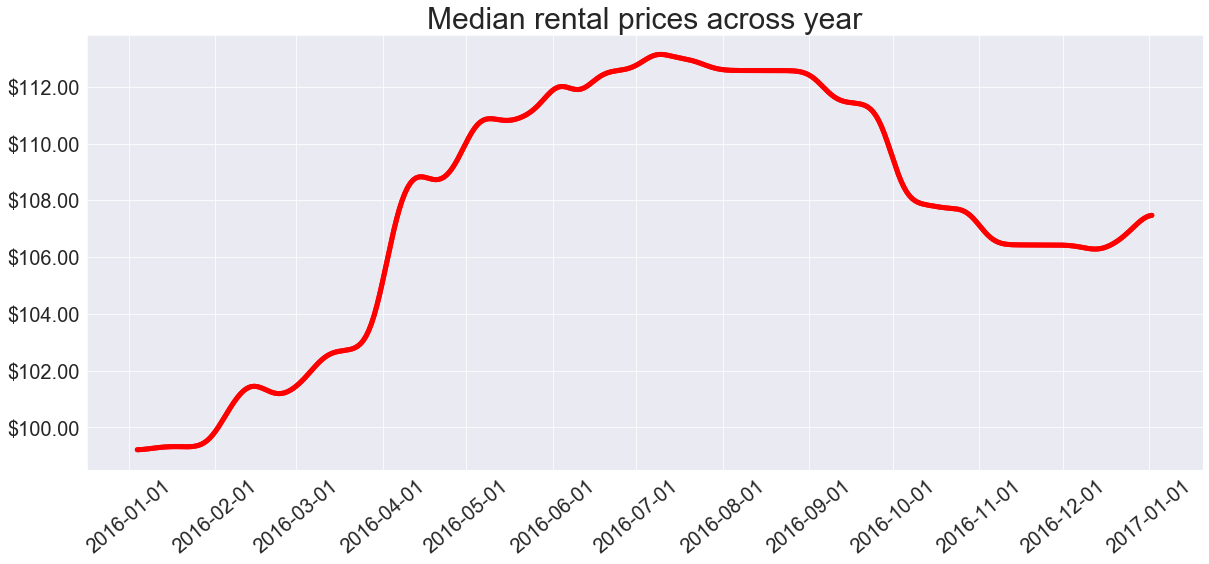

In [353]:
# plotting
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from scipy.ndimage.filters import gaussian_filter1d
import seaborn as sb
sb.set_style('darkgrid')


fig, ax = plt.subplots(figsize=(20,8))
x = [datetime.strptime(date, '%Y-%m-%d') for date in prices_median.index]
y = gaussian_filter1d(prices_median['price'], sigma=5)

ax.plot(x, y, 'r-', linewidth=5)

formatter = mtick.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.plot(x, y, 'r-', linewidth=5)
plt.title("Median rental prices across year", fontsize=30)
plt.xticks(size=20)
plt.xticks(rotation=40)
plt.yticks(size=20)

plt.show()

### Results/Evaluation

As we can see, prices are the hottest at the (horhor) hottest times of the year, peaking in the middle of summer in July.
Prices are the lowest in January. We note a jump discontinuity going from Dec to Jan, possibly reflecting a return back to work for holidaymakers.

## Question 2: Which property types are most rented?
## Question 3: How do cancellation policies affect listings?
## Question 4: How do host response times affect listings? 

### Data preparation

In [154]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [155]:
# convert available from t/f to binary 1/0
calendar['available'] = calendar['available'].map(lambda available_binary: 1 if available_binary == 't' else 0)
calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [160]:
# create dataframe of mean available and occupancy rates for every listing through the calendar year
listings_availability = calendar[['listing_id', 'available']].groupby('listing_id').mean()
listings_availability.head()

,available
listing_id,
3335,0.846575
4291,1.000000
5682,0.846575
6606,1.000000
7369,0.145205


In [168]:
listings_availability['occupied'] = 1 - listings_availability['available']
listings_availability.head()

,available,occupied
listing_id,,
3335,0.846575,0.153425
4291,1.000000,0.000000
5682,0.846575,0.153425
6606,1.000000,0.000000
7369,0.145205,0.854795


In [170]:
# create id column for join
listings_availability['id'] = listings_availability.index
listings_availability.head()

,available,occupied,id
listing_id,,,
3335,0.846575,0.153425,3335
4291,1.000000,0.000000,4291
5682,0.846575,0.153425,5682
6606,1.000000,0.000000,6606
7369,0.145205,0.854795,7369


In [172]:
# join listings_availability and listings datasets on listings id
df_popularity = pd.merge(listings_availability, listings, how='inner', left_on='id', right_on='id')

In [173]:
df_popularity.head()

,available,occupied,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.846575,0.153425,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,1.000000,0.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,0.846575,0.153425,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,1.000000,0.000000,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,0.145205,0.854795,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [345]:
def popularity_plot(feat, titlename, xtickrotation=90, popularity_threshold=0.95):
    
    """
    Draws a bar plot which
    a) compares the frequency of listings for a given categorical feature
    b) compares popularity of listings for each feature class i.e. segmenting each class of feature by popularity
    Popular is defined by occupancy rate = 0.95 or above
    
    Inputs:
    feat - categorical feature
    titlename - name of the plot
    xtickrotation - rotation angle of the x-axis labels
    popularity_threshold - threshold of occupancy rate
    """
    
    # create dataframe for plot
    # get counts of listings for popular vs others
    popular_count = df_popularity[df_popularity['occupied'] >= popularity_threshold][feat].value_counts()
    display(popular_count)
    others_count = df_popularity[df_popularity['occupied'] < popularity_threshold][feat].value_counts()
    display(others_count)
    
    # get proportions of listings for popular vs others
    popular_prop = pd.DataFrame(popular_count / sum(popular_count))
    popular_prop['popularity'] = 'Most popular listings'
    popular_prop['index'] = popular_prop.index
    display(popular_prop)
    others_prop = pd.DataFrame(others_count / sum(others_count))
    others_prop['popularity'] = 'Others'
    others_prop['index'] = others_prop.index 
    display(others_prop)
    
    df_plot = pd.concat([popular_prop, others_prop], ignore_index=True)
    plt.figure(figsize=(16,12))

    # plotting
    sb.barplot(x='index', y=feat, hue='popularity', data=df_plot, palette='BuGn_r')
    
    plt.title(titlename, fontsize=30)
    plt.xlabel('')
    plt.ylabel('proportion of listings', fontsize=20)
    plt.xticks(size=25)
    plt.xticks(rotation=xtickrotation)
    plt.yticks(size=20)
    
    plt.legend(loc=1, prop={'size': 30})
    plt.show()

Apartment          101
House               92
Townhouse            7
Condominium          7
Loft                 3
Bed & Breakfast      3
Bungalow             1
Tent                 1
Cabin                1
Name: property_type, dtype: int64

House              1641
Apartment          1607
Townhouse           111
Condominium          84
Loft                 37
Bed & Breakfast      34
Other                22
Cabin                20
Camper/RV            13
Bungalow             12
Boat                  8
Tent                  4
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

,property_type,popularity,index
Apartment,0.467593,Most popular listings,Apartment
House,0.425926,Most popular listings,House
Townhouse,0.032407,Most popular listings,Townhouse
Condominium,0.032407,Most popular listings,Condominium
Loft,0.013889,Most popular listings,Loft
Bed & Breakfast,0.013889,Most popular listings,Bed & Breakfast
Bungalow,0.004630,Most popular listings,Bungalow
Tent,0.004630,Most popular listings,Tent
Cabin,0.004630,Most popular listings,Cabin


,property_type,popularity,index
House,0.455707,Others,House
Apartment,0.446265,Others,Apartment
Townhouse,0.030825,Others,Townhouse
Condominium,0.023327,Others,Condominium
Loft,0.010275,Others,Loft
Bed & Breakfast,0.009442,Others,Bed & Breakfast
Other,0.006109,Others,Other
Cabin,0.005554,Others,Cabin
Camper/RV,0.003610,Others,Camper/RV
Bungalow,0.003332,Others,Bungalow


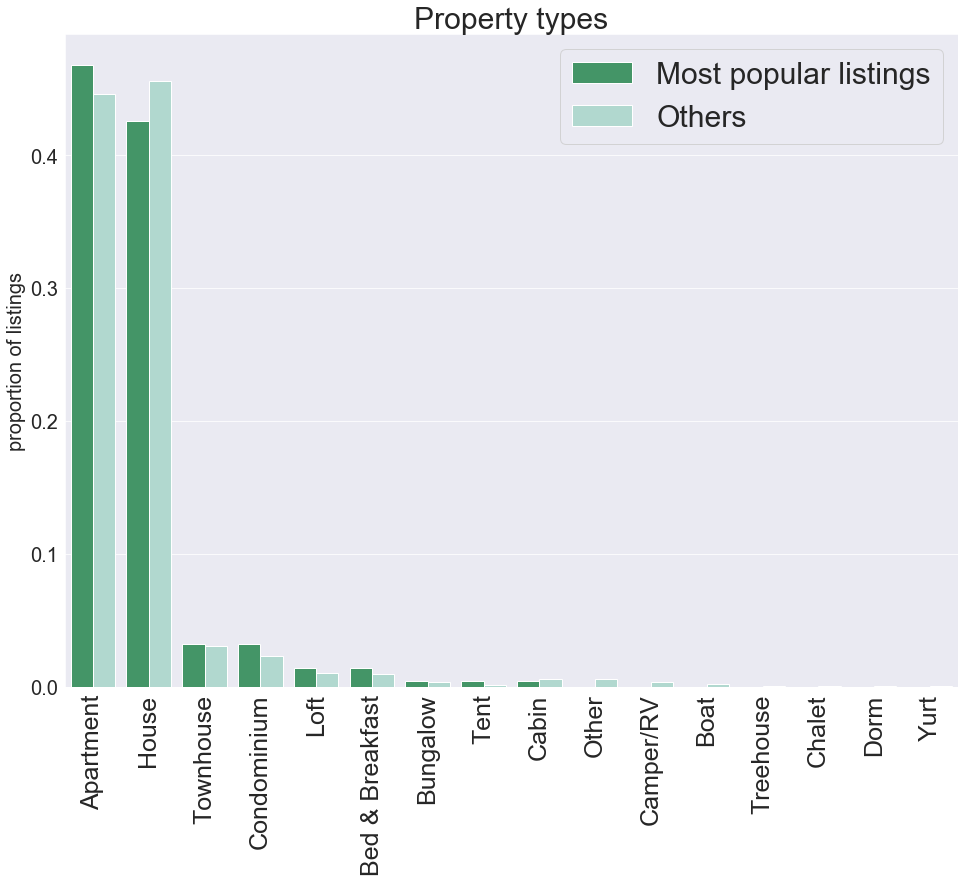

In [349]:
# property types
popularity_plot('property_type', 'Property types', 90, 0.95)

flexible    83
strict      68
moderate    65
Name: cancellation_policy, dtype: int64

strict      1349
moderate    1186
flexible    1067
Name: cancellation_policy, dtype: int64

,cancellation_policy,popularity,index
flexible,0.384259,Most popular listings,flexible
strict,0.314815,Most popular listings,strict
moderate,0.300926,Most popular listings,moderate


,cancellation_policy,popularity,index
strict,0.374514,Others,strict
moderate,0.329262,Others,moderate
flexible,0.296224,Others,flexible


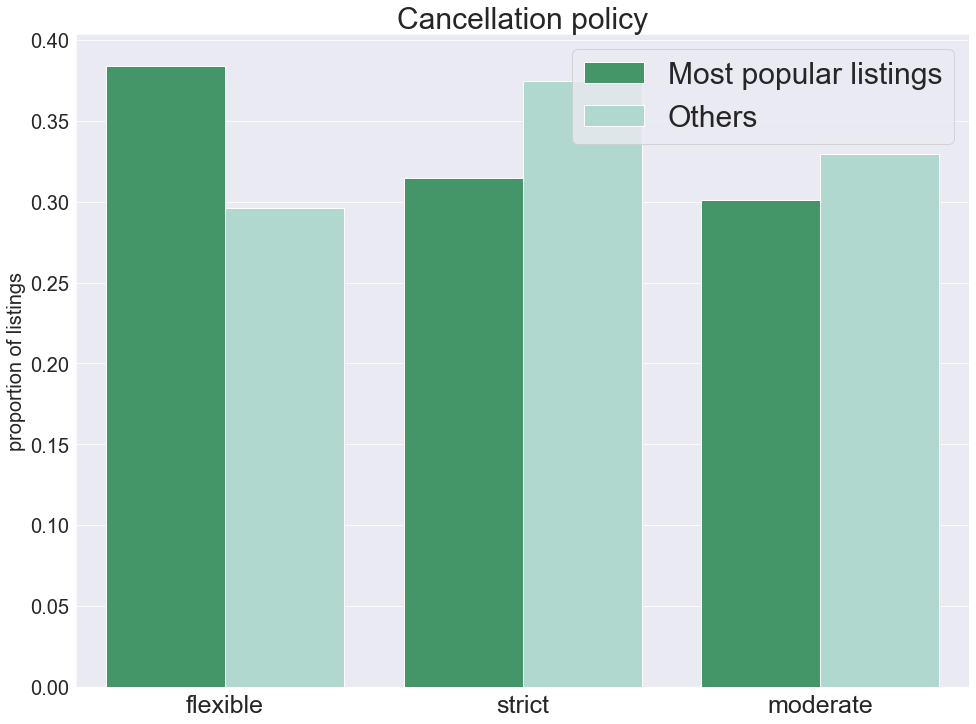

In [350]:
# cancellation policies
popularity_plot('cancellation_policy', 'Cancellation policy', 0, 0.95)

within an hour        62
within a few hours    49
within a day          39
a few days or more     2
Name: host_response_time, dtype: int64

within an hour        1630
within a few hours     919
within a day           558
a few days or more      36
Name: host_response_time, dtype: int64

,host_response_time,popularity,index
within an hour,0.407895,Most popular listings,within an hour
within a few hours,0.322368,Most popular listings,within a few hours
within a day,0.256579,Most popular listings,within a day
a few days or more,0.013158,Most popular listings,a few days or more


,host_response_time,popularity,index
within an hour,0.518613,Others,within an hour
within a few hours,0.292396,Others,within a few hours
within a day,0.177537,Others,within a day
a few days or more,0.011454,Others,a few days or more


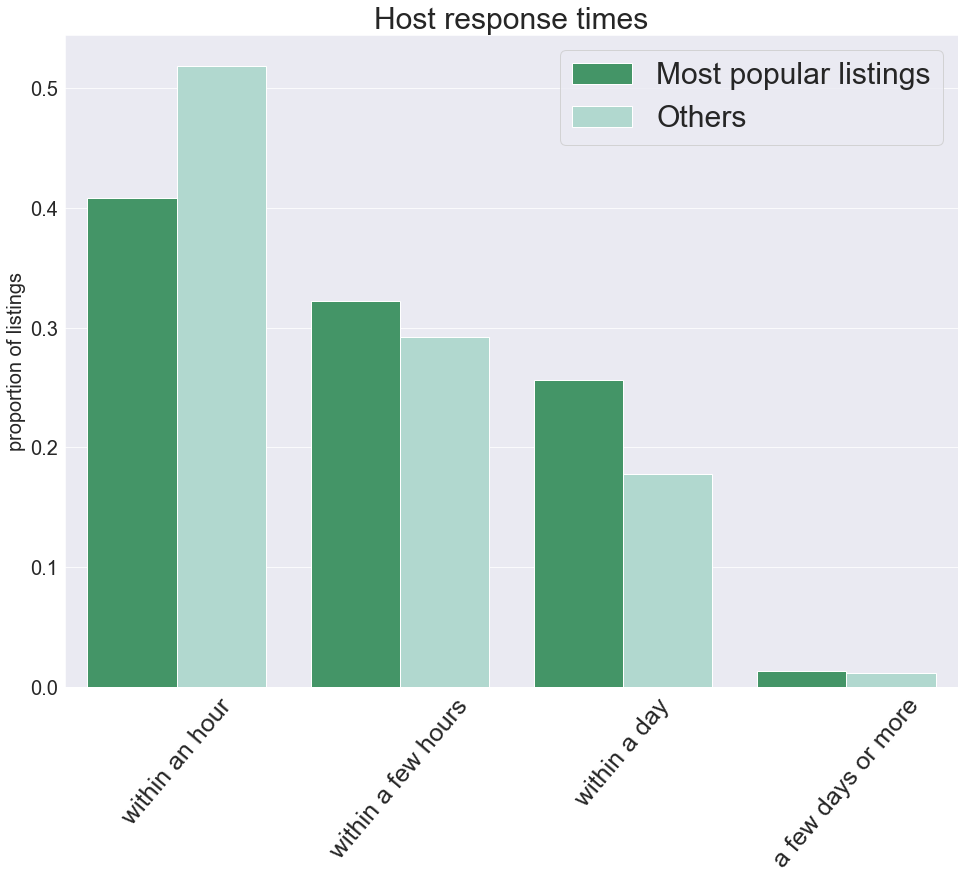

In [351]:
# host response time
popularity_plot('host_response_time', 'Host response times',  50, 0.95)

### Results/Evaluation

- Rather than simply compare the frequencies of the classes/categories of each feature, we also segmented each class by popular and less popular listings. We defined popular listings to be those with a 95% occupancy rate or more.
- Comparing listings of different property types, we found that houses and apartments were the most rented. This shouldn't come as a surprise as these are probably the most common types of properties.
- Comparing listings with different cancellation policies, we found that this did not generally affect listing behaviour. However we did note that popular listings tended to have flexible policies.
- Comparing listings with different host response times, we found that the more rented properties had faster response times. This was true irrespective of whether we were looking at the most popular listings or not.